In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('./data/german_credit_data.csv').drop('Unnamed: 0', axis = 1)

In [4]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [5]:
data['date'] = '2022/08/31'

In [6]:
from preprocessing import preprocessing

In [7]:
preprocessing(data, NA = 'mean_mode', to_date = 'date', dummies = 'Purpose').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 1000 non-null   datetime64[ns]
 1   Sex                  1000 non-null   object        
 2   Housing              1000 non-null   object        
 3   Saving accounts      1000 non-null   object        
 4   Checking account     1000 non-null   object        
 5   business             1000 non-null   int64         
 6   car                  1000 non-null   int64         
 7   domestic appliances  1000 non-null   int64         
 8   education            1000 non-null   int64         
 9   furniture/equipment  1000 non-null   int64         
 10  radio/TV             1000 non-null   int64         
 11  repairs              1000 non-null   int64         
 12  vacation/others      1000 non-null   int64         
 13  Age                  1000 non-null

In [8]:
data_num = data.select_dtypes(include=np.number) #only numerical columns
data_cat = data.drop(data_num.columns, axis = 1)

In [9]:
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence

from sklearn.ensemble import RandomForestClassifier

In [10]:
path = './data/german_raw.csv'
df = pd.read_csv(path)
df.head()

,GoodCustomer,Gender,ForeignWorker,Single,Age,LoanDuration,PurposeOfLoan,LoanAmount,LoanRateAsPercentOfIncome,YearsAtCurrentHome,...,OtherLoansAtBank,OtherLoansAtStore,HasCoapplicant,HasGuarantor,OwnsHouse,RentsHouse,Unemployed,YearsAtCurrentJob_lt_1,YearsAtCurrentJob_geq_4,JobClassIsSkilled
0,1,Male,0,1,67,6,Electronics,1169,4,4,...,0,0,0,0,1,0,0,0,1,1
1,-1,Female,0,0,22,48,Electronics,5951,2,2,...,0,0,0,0,1,0,0,0,0,1
2,1,Male,0,1,49,12,Education,2096,2,3,...,0,0,0,0,1,0,0,0,1,0
3,1,Male,0,1,45,42,Furniture,7882,2,4,...,0,0,0,1,0,0,0,0,1,1
4,-1,Male,0,1,53,24,NewCar,4870,3,4,...,0,0,0,0,0,0,0,0,0,1


In [11]:
clf = RandomForestClassifier()

X = preprocessing(df.drop('GoodCustomer', axis = 1), NA = 'mean_mode', normalization=True, norm_type='norm', dummies = 'all').dropna(axis = 1)
y = df['GoodCustomer']

In [12]:
clf.fit(X, y)

RandomForestClassifier()

In [13]:
partial_dependence(clf, X=X.sample(100), features=[14,16],
                   kind = 'average')['average'][0]

array([[0.5971, 0.594 , 0.5868, ..., 0.5088, 0.5084, 0.4481],
       [0.6092, 0.6061, 0.5986, ..., 0.4981, 0.4977, 0.4215],
       [0.6147, 0.6142, 0.6065, ..., 0.5004, 0.5   , 0.4231],
       ...,
       [0.6808, 0.6801, 0.6764, ..., 0.5286, 0.5282, 0.4405],
       [0.6754, 0.6747, 0.671 , ..., 0.5341, 0.5337, 0.4435],
       [0.6781, 0.6774, 0.6737, ..., 0.5369, 0.5365, 0.4463]])

<Figure size 2000x2000 with 0 Axes>

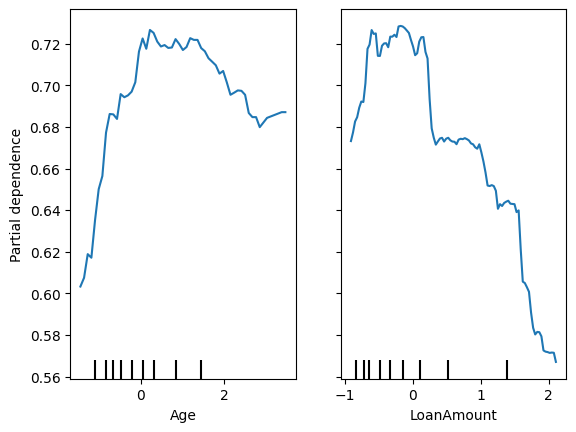

In [14]:
plt.figure(figsize = (20,20))
features = [14, 16] #cada número representa uma feature 
PartialDependenceDisplay.from_estimator(clf, X, features)